(ref:lec5:ex2_sol)=
# Solutions of Exercise 5.2

```{figure} res/ex2-block.svg
---
width: 750px
name: fig:lec5:ex2_sol:block
---
Block diagram of the control system
```

The controller $F(s) = \frac{s+10}{s}$ was designed assuming that the system $G^0(s)$ was identical to the model $G(s) = \frac{1}{s+10}$. 
In {numref}`fig:lec5:ex2_sol:bode`, the **nominal** open-loop transfer function $G_o(s) = F(s) \cdot G(s)$.

1. Sketch the **nominal complementary sensitivity function** $T(s)$ using the sketching rules discussed in Lecture F7.

Unfortunately, there's a mismatch between the real system $G^0(s)$ and its model $G(s)$. In fact

$$
G^0(s) = G(s) \left( 1 + \Delta(s) \right)
$$

where the *multiplicative uncertainty* $\Delta(s)$ does not have any pole in the right-hand half plane, but is not known. We know, however, an upper bound for its amplitude

$$
\lvert \Delta(i \omega) \lvert \leq \frac{0.9}{\sqrt{1 + \omega^2}} = \left\lvert \frac{0.9}{1 + i \omega} \right\lvert
$$ (eq:lec5:ex2_sol:uncertainty)

2. Does the feedback controller $F(s)$, implemented as in {numref}`fig:lec5:ex2_sol:block`, guarentee the closed-loop stability for $G^0(s)$ despite the uncertainty?



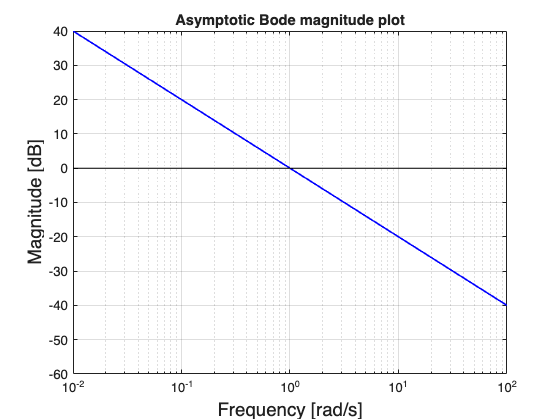

In [22]:
G = tf(1, [1, 10]);
F = tf([1, 10], [1, 0]);
Go = minreal(G * F); % Simplify the transfer function to remove any pole-zero cancellations
if ~exist('asymptotic_bodemag')
    urlwrite('https://raw.githubusercontent.com/bonassifabio/1RT485/refs/heads/main/book/res/matlab/asymptotic_bodemag.m', 'asymptotic_bodemag.m');
end


[w, Go_nominal] = asymptotic_bodemag(Go); ylim([-60, 40]); xlim([0.01, 100]); hold on;
plot(xlim, [0, 0], 'k', 'LineWidth', 0.5);
% plot(w, 20*log10(0.9 ./ sqrt(1 + w.^2)), 'g', 'LineWidth', 1.5);
xlim([0.01, 100]);
ylim([-60, 40]);


---

## Solution


### Question 1

The nominal complementary sensitivity transfer function $T(s)$ is defined as 

$$
T(s) = \frac{G_o(s)}{1 + G_o(s)},
$$

where $G_o(s)$ is the nominal open-loop transfer function (*mind the difference between $G_o(s)$ and $G^0(s), they are two different things!*).

To sketch $\lvert T(i \omega) \lvert_{\text{dB}}$ we use the rule {eq}`eq:lec5:ex0_sol:complementary_sensitivity`. By sketching it on top of {numref}`fig:lec5:ex2_sol:bode` we get 

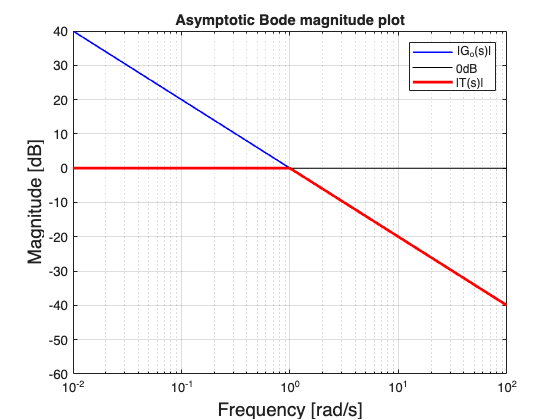

In [28]:
[w, Go_nominal] = asymptotic_bodemag(Go); 
ylim([-60, 40]); xlim([0.01, 100]); hold on;
idx = find(abs(Go_nominal) <= 1e-3, 1, 'first');

% If zero is never reached, stop at the end
if isempty(idx)
    idx = length(Go_nominal);
end

% plot(w, 20*log10(0.9 ./ sqrt(1 + w.^2)), 'g', 'LineWidth', 1.5);
xlim([0.01, 100]);
ylim([-60, 40]);
% Build modified magnitude
sensitivity = zeros(size(Go_nominal));
sensitivity(idx+1:end) = Go_nominal(idx+1:end);
plot(xlim, [0, 0], 'k', 'LineWidth', 0.5);
plot(w, sensitivity, 'Color', 'r', 'LineWidth', 2);
legend('|G_o(s)|', '0dB', '|T(s)|');
% plot([50, 50], [-40, -13.5], '--k', 'LineWidth', 1.25);

### Question 2

The ancillary assumptions of Criterion 6.2 (Criterion for robustness to model mismatch) are satisfied. To verify whether $F(s)$ guarantees the closed-loop stability for the real system $G^0(s)$, we need to:
- Sketch $\lvert \Delta(i \omega) \lvert_{\text{dB}}$
- Mirror it with respect to the 0dB axis to get $-\lvert \Delta(i \omega) \lvert_{\text{dB}}$
- Verify that $\lvert T(i \omega)\lvert_{\text{dB}} < -\lvert \Delta(i \omega) \lvert_{\text{dB}}$

Note that {eq}`eq:lec5:ex2_sol:uncertainty` represents the magnitude $\frac{0.9}{1+s}$. Therefore its magnitude Bode plot will be flat at $20 \log_{10}(0.9) = -1$ dB for $\omega < 1$ rad/s, after which it decreases with a slope $-20$ dB/decade.

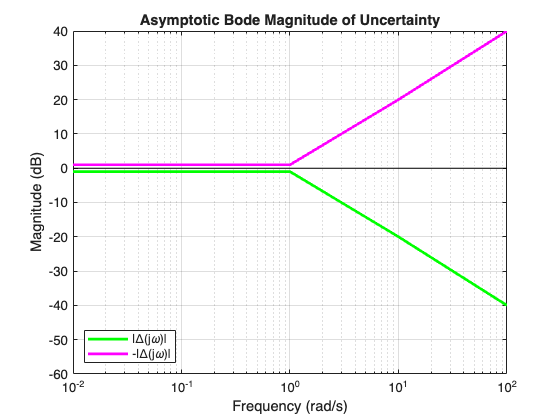

In [36]:
w_delta = [0.01, 1, 10, 100];
Delta_mag = [-1, -1, -20, -40];
figure; 
plot(w_delta, Delta_mag, 'Color', 'g', 'LineWidth', 2); hold on; grid on;
plot(w_delta, -Delta_mag, 'Color', 'm', 'LineWidth', 2); 
plot([0.01, 100], [0, 0], 'k', 'LineWidth', 0.5);
legend('|\Delta(j\omega)|', '-|\Delta(j\omega)|', 'Location', 'SouthWest');
xlabel('Frequency (rad/s)');
ylabel('Magnitude (dB)');
title('Asymptotic Bode Magnitude of Uncertainty');
ylim([-60, 40]); xlim([0.01, 100]);
xscale('log');

Now we can compare $\lvert T(i \omega) \lvert_{\text{dB}}$ to $-\lvert \Delta (i \omega) \lvert_{\text{dB}}$, to make sure the former is always smaller than the latter.

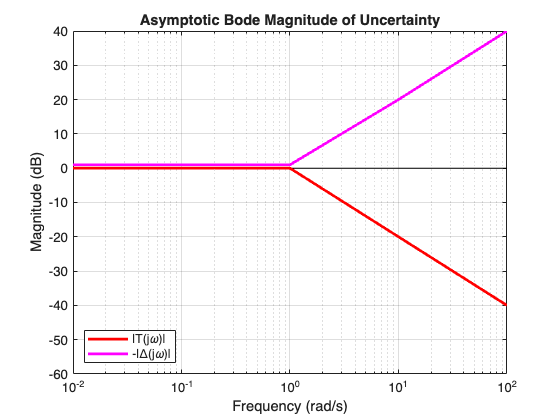

In [38]:
figure; 
plot(w, sensitivity, 'Color', 'r', 'LineWidth', 2); hold on; grid on;
plot(w_delta, -Delta_mag, 'Color', 'm', 'LineWidth', 2); 
plot([0.01, 100], [0, 0], 'k', 'LineWidth', 0.5);
% Re-plot to make sure it's on top of the 0dB axis
plot(w, sensitivity, 'Color', 'r', 'LineWidth', 2); hold on; grid on;
legend('|T(j\omega)|', '-|\Delta(j\omega)|', 'Location', 'SouthWest');
xlabel('Frequency (rad/s)');
ylabel('Magnitude (dB)');
title('Asymptotic Bode Magnitude of Uncertainty');
ylim([-60, 40]); xlim([0.01, 100]);
xscale('log');

As we can see, the condition is satisfied at every frequency $\omega$. Therefore, the robust closed-loop stability can be guaranteed.

```{admonition} Warning
:class: warning

**If** $\lvert T(i \omega)\lvert_{\text{dB}}$ is higher than $-\lvert \Delta (i \omega) \lvert_{\text{dB}}$, **even in a narrow range of frequencies**, robust closed-loop stability **could not** be guaranteed!
```